<a href="https://colab.research.google.com/github/swatikdma/API/blob/main/taffic_1_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# !unzip /content/gdrive/MyDrive/Cpc/archive.zip

In [3]:
 from sklearn import preprocessing
 import numpy as np
 X_trainX = np.array([[ 1., -1.,  2.],
                     [ 2.,  0.,  0.],
                     [ 0.,  1., -1.]])
 
X_testX=X_trainX

In [4]:
import os
path_tarin="/content/gdrive/MyDrive/Python-Project-Traffic-Sign-Classification/p/Train"
os.chdir(path_tarin)
# os.chdir("0")
path = os.listdir()


# os.getcwd()
# path

In [6]:
train_data=[]
for i in range(43):
    # get file names'
    mypath = path_tarin+'/'+ path[i] + '/'
    files = [mypath + f for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]
    train_data.append(files)
    # for fn in files:
    #   try:

In [ ]:
train_data

In [ ]:
# from PIL import Image

# image = Image.open("/content/Train/0/00000_00000_00000.png")
# image = image.resize((30,30))

In [7]:
os.getcwd()
os.chdir("..")


In [13]:
!pwd

/content/gdrive/My Drive/Python-Project-Traffic-Sign-Classification


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image,ImageOps
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

i=0
for files in train_data:
    print(i)
    for fil in files:
        try:
            # np.append("\\")
            image = Image.open(fil)
            # image = ImageOps.grayscale(image)
            image = image.resize((30,30))
            image = np.array(image)

            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")
    i=i+1


#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#  noramliztion 
# scaler = preprocessing.StandardScaler().fit(X_trainX)
# scaler = preprocessing.StandardScaler().fit(X_testX)


print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)



0
1


In [16]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))



In [17]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")



Epoch 1/15
981/981 [==============================] - 134s 136ms/step - loss: 3.3751 - accuracy: 0.2845 - val_loss: 0.6736 - val_accuracy: 0.8313
Epoch 2/15
981/981 [==============================] - 133s 135ms/step - loss: 0.8349 - accuracy: 0.7480 - val_loss: 0.2023 - val_accuracy: 0.9424
Epoch 3/15
981/981 [==============================] - 132s 135ms/step - loss: 0.4706 - accuracy: 0.8596 - val_loss: 0.1231 - val_accuracy: 0.9661
Epoch 4/15
981/981 [==============================] - 132s 135ms/step - loss: 0.3495 - accuracy: 0.8992 - val_loss: 0.1011 - val_accuracy: 0.9732
Epoch 5/15
981/981 [==============================] - 133s 135ms/step - loss: 0.2799 - accuracy: 0.9189 - val_loss: 0.0972 - val_accuracy: 0.9722
Epoch 6/15
981/981 [==============================] - 132s 135ms/step - loss: 0.2690 - accuracy: 0.9240 - val_loss: 0.0947 - val_accuracy: 0.9730
Epoch 7/15
981/981 [==============================] - 132s 135ms/step - loss: 0.2528 - accuracy: 0.9261 - val_loss: 0.1077 -

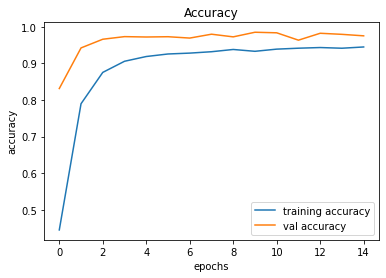

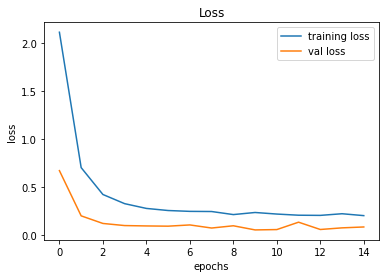

In [18]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()



In [1]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test = pd.read_csv("/content/gdrive/MyDrive/Python-Project-Traffic-Sign-Classification/p/Test.csv")

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open('/content/gdrive/MyDrive/Python-Project-Traffic-Sign-Classification/p/'+img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test=np.array(data)

pred = model.predict_classes(X_test)



NameError: ignored

In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, pred)*1000)

model.save('traffic_classifier.h5')

In [ ]:
# !git clone https://github.com/rahulsonone1234/Traffic-Sign-Recognition